In [26]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings('ignore')

import scipy.io

In [51]:
def import_data(filename='data/letter.mat'):
    """Return X and Y data from MATLAB data
    Given a MATLAB file, returns the data stored in
    variables X and Y in Pandas DataFrame format.
    
    Args:
        filename(str): Name of the file

    Returns:
        x_col(object): Pandas DataFrame containing
            values in variable X
        y_col(object): Pandas DataFrame containing
            values in variable Y
    """
    x_col = scipy.io.loadmat(filename)['X']
    y_col = scipy.io.loadmat(filename)['y']
    
    x_col = pd.DataFrame(x_col)
    y_col = pd.DataFrame(y_col)
    
    return [x_col, y_col]


def normalize_data(data):
    """Normalizes given data.
    For a given Pandas DataFrame, uses the StandardScaler
    implementation to fit to the data and normalize it.
    
    Args:
        data(object): Pandas DataFrame containing numerical
            data points to be normalized.

    Returns:
        norm_data(object): Normalized data
    """
    try:
        norm_data = StandardScaler().fit_transform(data)
        return norm_data
    except Exception as e:
        print(e)

    return


In [3]:
def evaluate_dbscan(data, ):
    

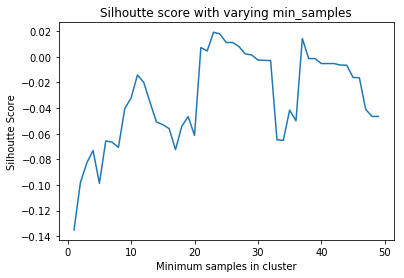

In [6]:
scores = []

for i in range(1,50):
    try:
        dbscan = DBSCAN(eps=3, min_samples=i);
        model = dbscan.fit(x_col);
        labels = model.labels_
        score = silhouette_score(x_col, labels);
        scores.append([i, score]);
    except:
        pass
scores = np.array(scores)  
plt.scatter(scores[:,0], scores[:,1]);
plt.xlabel("Minimum samples in cluster");
plt.ylabel("Silhoutte Score");
plt.title("Silhoutte score with varying min_samples");

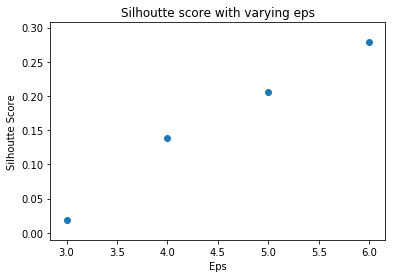

In [23]:
scores = []

for i in ([0.1, 0.2, 0.5, 0.75, 1] + list(range(10)) ):
    try:
        dbscan = DBSCAN(eps=i, min_samples=24);
        model = dbscan.fit(x_col);
        labels = model.labels_
        score = silhouette_score(x_col, labels);
        scores.append([i, score]);
    except:
        pass
scores = np.array(scores)  
plt.scatter(scores[:,0], scores[:,1]);
plt.xlabel("Eps");
plt.ylabel("Silhoutte Score");
plt.title("Silhoutte score with varying eps");

**Conclusion** - Seems like the best parameters are eps=6, and min_samples=24.

In [88]:
dbscan = DBSCAN(eps=3, min_samples=4);
model = dbscan.fit(x_col);
labels = model.labels_

In [91]:
y_pred = [1 if x == -1 else 0 for x in labels]
y_true = list(y_col.to_numpy().reshape(1,-1)[0])
from sklearn.metrics import confusion_matrix, classification_report, f1_score

In [90]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.76      0.86      1500
           1       0.20      0.91      0.33       100

   micro avg       0.77      0.77      0.77      1600
   macro avg       0.60      0.83      0.59      1600
weighted avg       0.94      0.77      0.83      1600



In [93]:
round(f1_score(y_true, y_pred),2)

0.33